In [1]:
#https://www.amazon.in/Noise-Bluetooth-Wireless-30-Hours-Instacharge/product-reviews/B09Y5MK1KB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [3]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


In [59]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from PIL import Image

In [7]:
Airdopes_reviews=[]

#Extracting reviews from amazon for product boAt Airdopes watch

In [10]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Noise-Bluetooth-Wireless-30-Hours-Instacharge/product-reviews/B09Y5MK1KB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    Airdopes_reviews= Airdopes_reviews+op

In [11]:
Airdopes_reviews

["\nHONEST REVIEW :-I got these buds in ₹895/- and I only buy earbuds because of the music, movies, series...MUSIC EXPERIENCE- 4.5/5 (Tbh I like to hear balanced music like crystal clear sound with a balanced bass but yeah if you are bass lover then just think again before buying it)BATTERY - 5/5HYPERSYNC - 5/5BLUETOOTH - 3.5/5 (I checked the box and there it's written Bluetooth 5.3 but its range is low and that's not up to my expectations... But It will work for me...) So yeah if you are just buying it for Bluetooth 5.3... just think again...INSTACHARGE- 5/5 It actually works very well...BUDS- 4.5/5 ( In ear design is good and they fits perfectly also you can do workout, exercise, running etc... but if your own ears are somewhat different like so big then it's your problem Although it comes with different buds sizes so u can try them...;)Buds are really so light so yeah I personally like them...CALLING EXPERIENCE (VOICE/VIDEO CALL) 3.5/5These buds don't come with ANC Mode so please do

In [12]:
reviews = ' '.join(Airdopes_reviews)

#Data Cleaning

In [13]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower()
reviews = re.sub("[0-9" "]+"," ",reviews).lower()
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

In [16]:
reviews

' honest review i got these buds in and i only buy earbuds because of the music movies series music experience tbh i like to hear balanced music like crystal clear sound with a balanced bass but yeah if you are bass lover then just think again before buying it battery hypersync bluetooth i checked the box and there it s written bluetooth but its range is low and that s not up to my expectations but it will work for me so yeah if you are just buying it for bluetooth just think again instacharge it actually works very well buds in ear design is good and they fits perfectly also you can do workout exercise running etc but if your own ears are somewhat different like so big then it s your problem although it comes with different buds sizes so u can try them buds are really so light so yeah i personally like them calling experience voice video call these buds don t come with anc mode so please don t buy them just for anc and incall range is too low which i really don t expected but it will 

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#tokenize

In [17]:
reviews_token = word_tokenize(reviews)

In [19]:
reviews_token

['honest',
 'review',
 'i',
 'got',
 'these',
 'buds',
 'in',
 'and',
 'i',
 'only',
 'buy',
 'earbuds',
 'because',
 'of',
 'the',
 'music',
 'movies',
 'series',
 'music',
 'experience',
 'tbh',
 'i',
 'like',
 'to',
 'hear',
 'balanced',
 'music',
 'like',
 'crystal',
 'clear',
 'sound',
 'with',
 'a',
 'balanced',
 'bass',
 'but',
 'yeah',
 'if',
 'you',
 'are',
 'bass',
 'lover',
 'then',
 'just',
 'think',
 'again',
 'before',
 'buying',
 'it',
 'battery',
 'hypersync',
 'bluetooth',
 'i',
 'checked',
 'the',
 'box',
 'and',
 'there',
 'it',
 's',
 'written',
 'bluetooth',
 'but',
 'its',
 'range',
 'is',
 'low',
 'and',
 'that',
 's',
 'not',
 'up',
 'to',
 'my',
 'expectations',
 'but',
 'it',
 'will',
 'work',
 'for',
 'me',
 'so',
 'yeah',
 'if',
 'you',
 'are',
 'just',
 'buying',
 'it',
 'for',
 'bluetooth',
 'just',
 'think',
 'again',
 'instacharge',
 'it',
 'actually',
 'works',
 'very',
 'well',
 'buds',
 'in',
 'ear',
 'design',
 'is',
 'good',
 'and',
 'they',
 'fits'

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [56]:
reviews_without_sw[:10]

['honest',
 'review',
 'buds',
 'buy',
 'earbuds',
 'music',
 'movies',
 'series',
 'music',
 'experience']

In [23]:
reviews=' '.join(reviews_without_sw)
reviews

'honest review buds buy earbuds music movies series music experience tbh hear balanced music crystal clear sound balanced bass bass lover buying battery hypersync bluetooth checked box written bluetooth range low expectations work buying bluetooth instacharge works buds ear design fits perfectly workout exercise running ears different big problem different buds sizes buds light personally calling experience voice video call buds anc buy anc incall range low expected work case plastic body matt finished size medium niether big small personally vs case case pretty atlast guys deal currently showing price expensive price range tws oppo enco buds currently thinks option rounder choice option buds hr day music home prefer watch movies series buds movies series hope review guys short failed haha product shown play time varies different currently working hrs modrate pair different buds efficient respect ignore battery issue buds amazing sound bass extra boosted touch fantastic major drawback 

#Word cloud

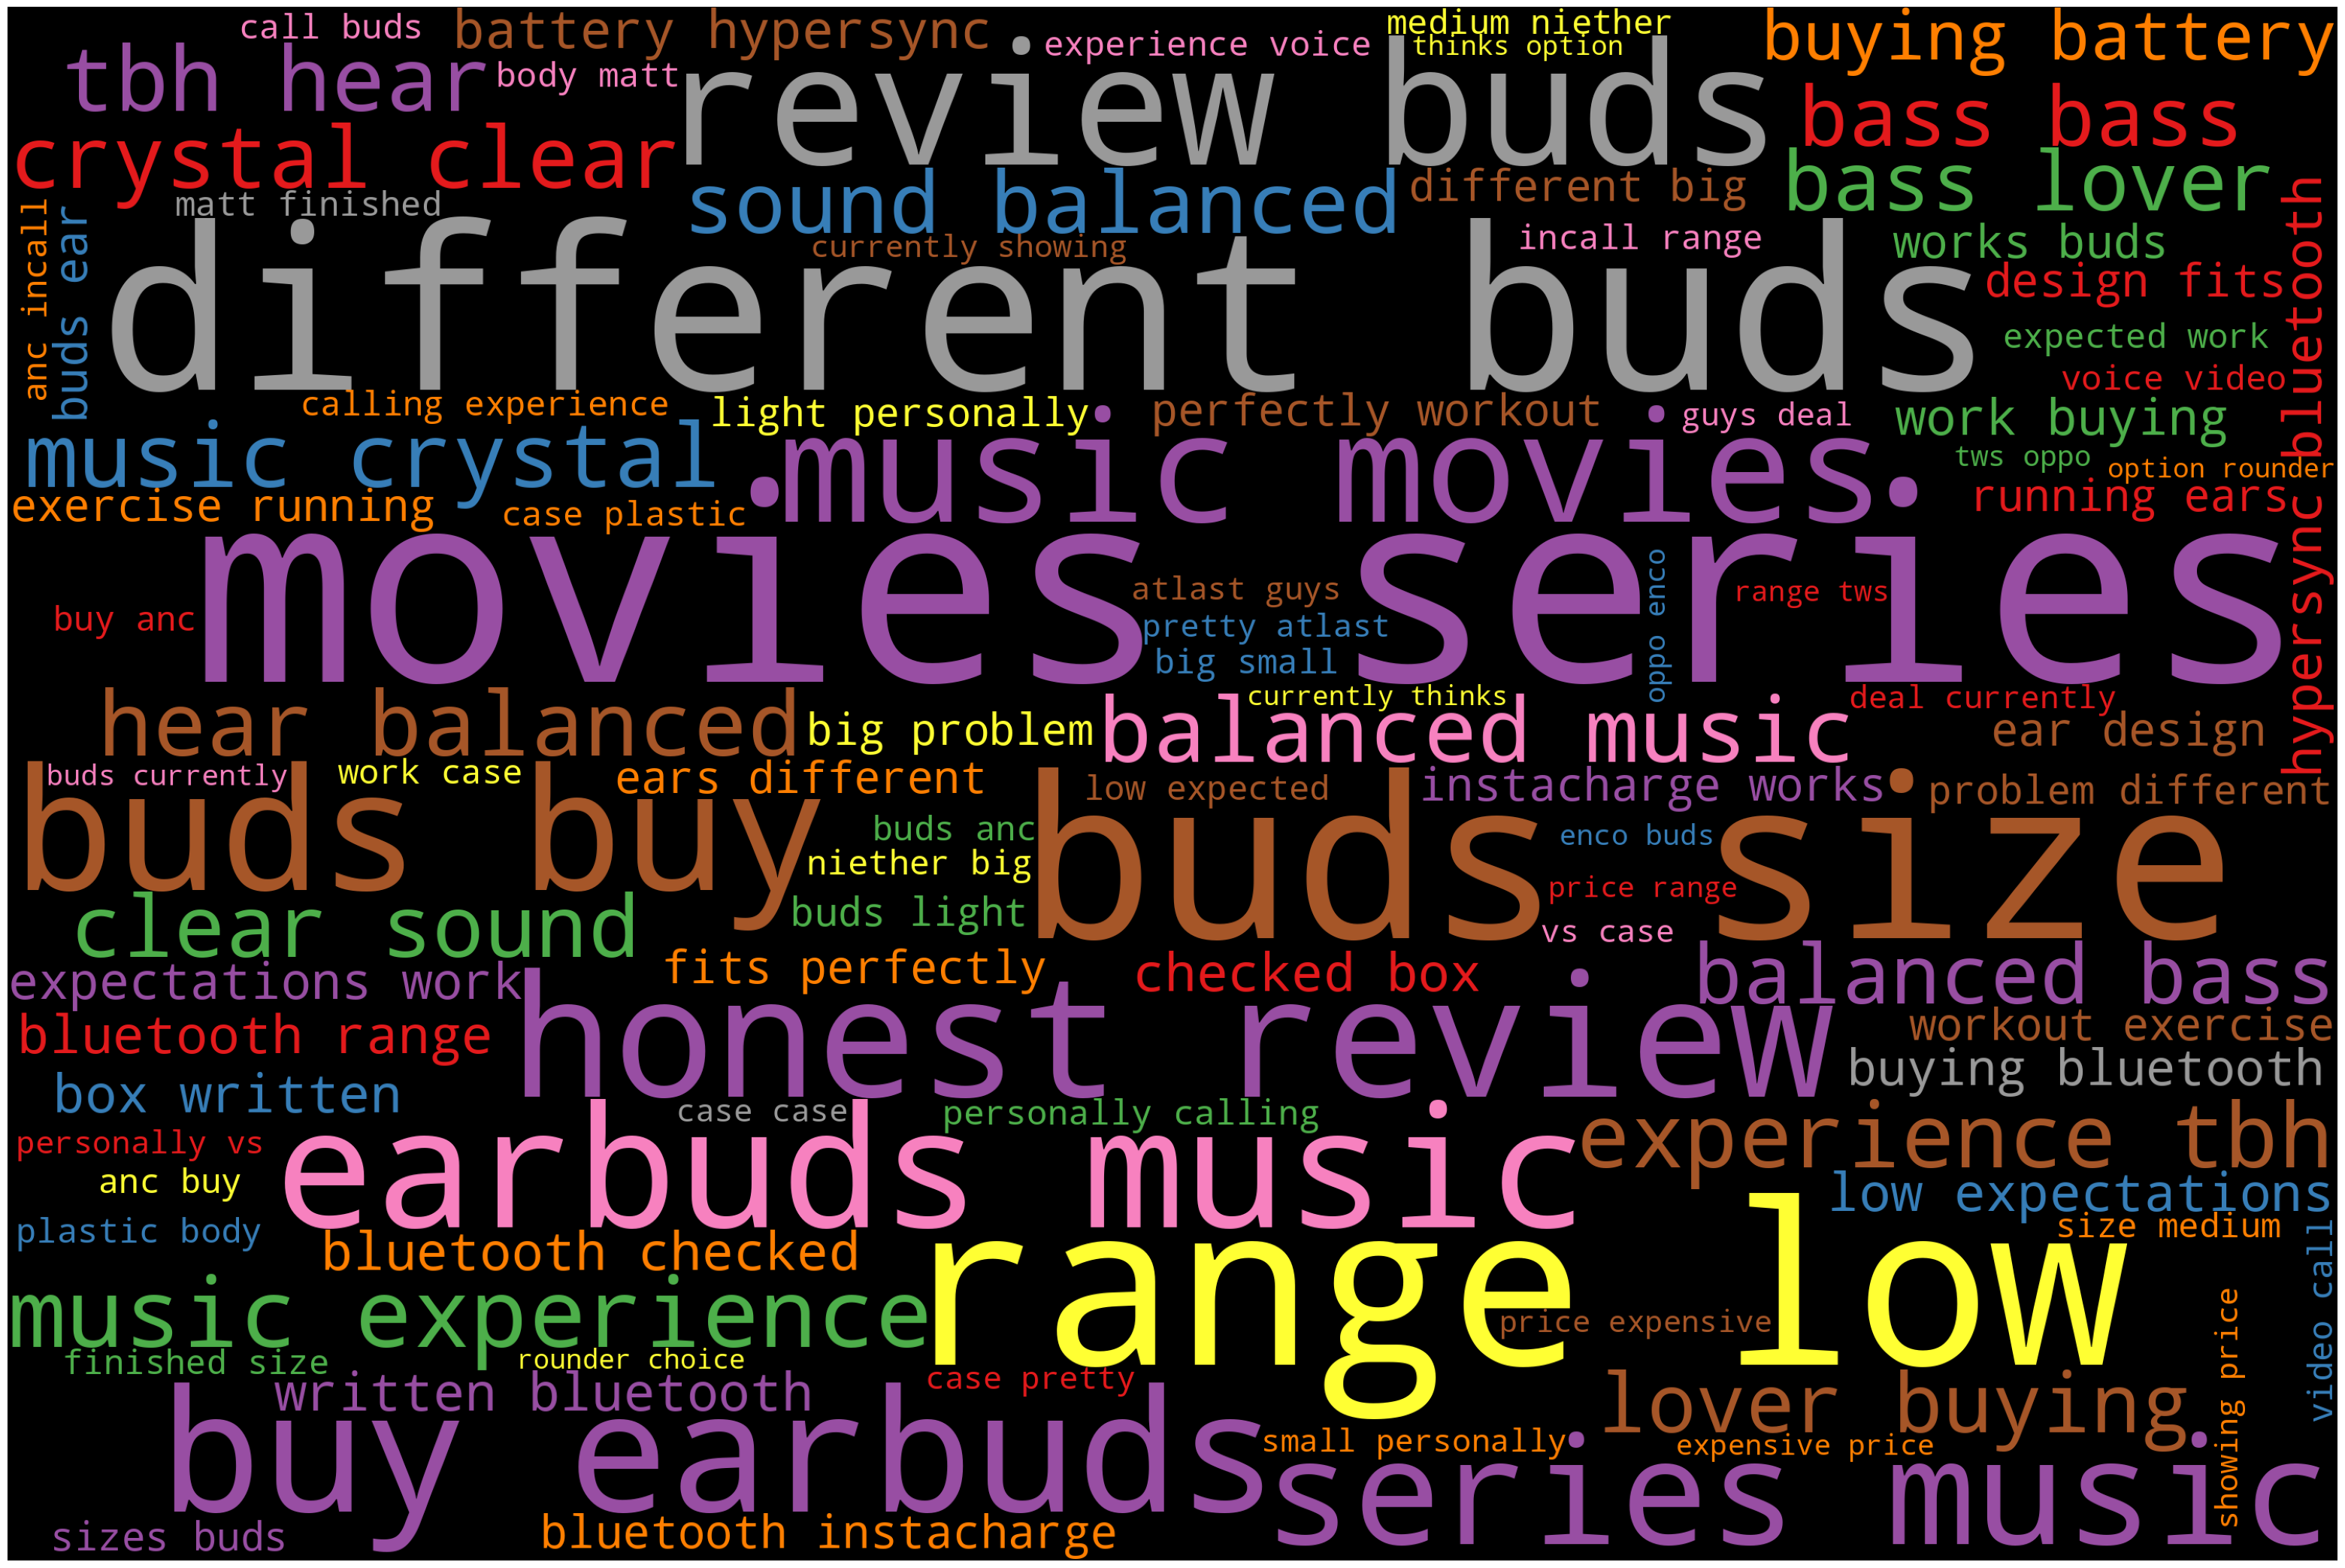

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

# positive word

In [26]:
with open("positive-words.txt","r") as f:
    positive=f.read().split("\n")

In [29]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [33]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

In [34]:
reviews_pos


'honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amazing fantastic amazing awesome cute nice nice worth honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amazing fantastic amazing awesome cute nice nice worth honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amazing fantastic amazing awesome cute nice nice worth honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amazing fantastic amazing awesome cute nice nice worth honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amazing fantastic amazing awesome cute nice nice worth honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amazing fantastic amazing awesome cute nice nice worth honest balanced clear balanced lover work works perfectly work pretty prefer efficient respect amaz

#Word Cloud

In [43]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')

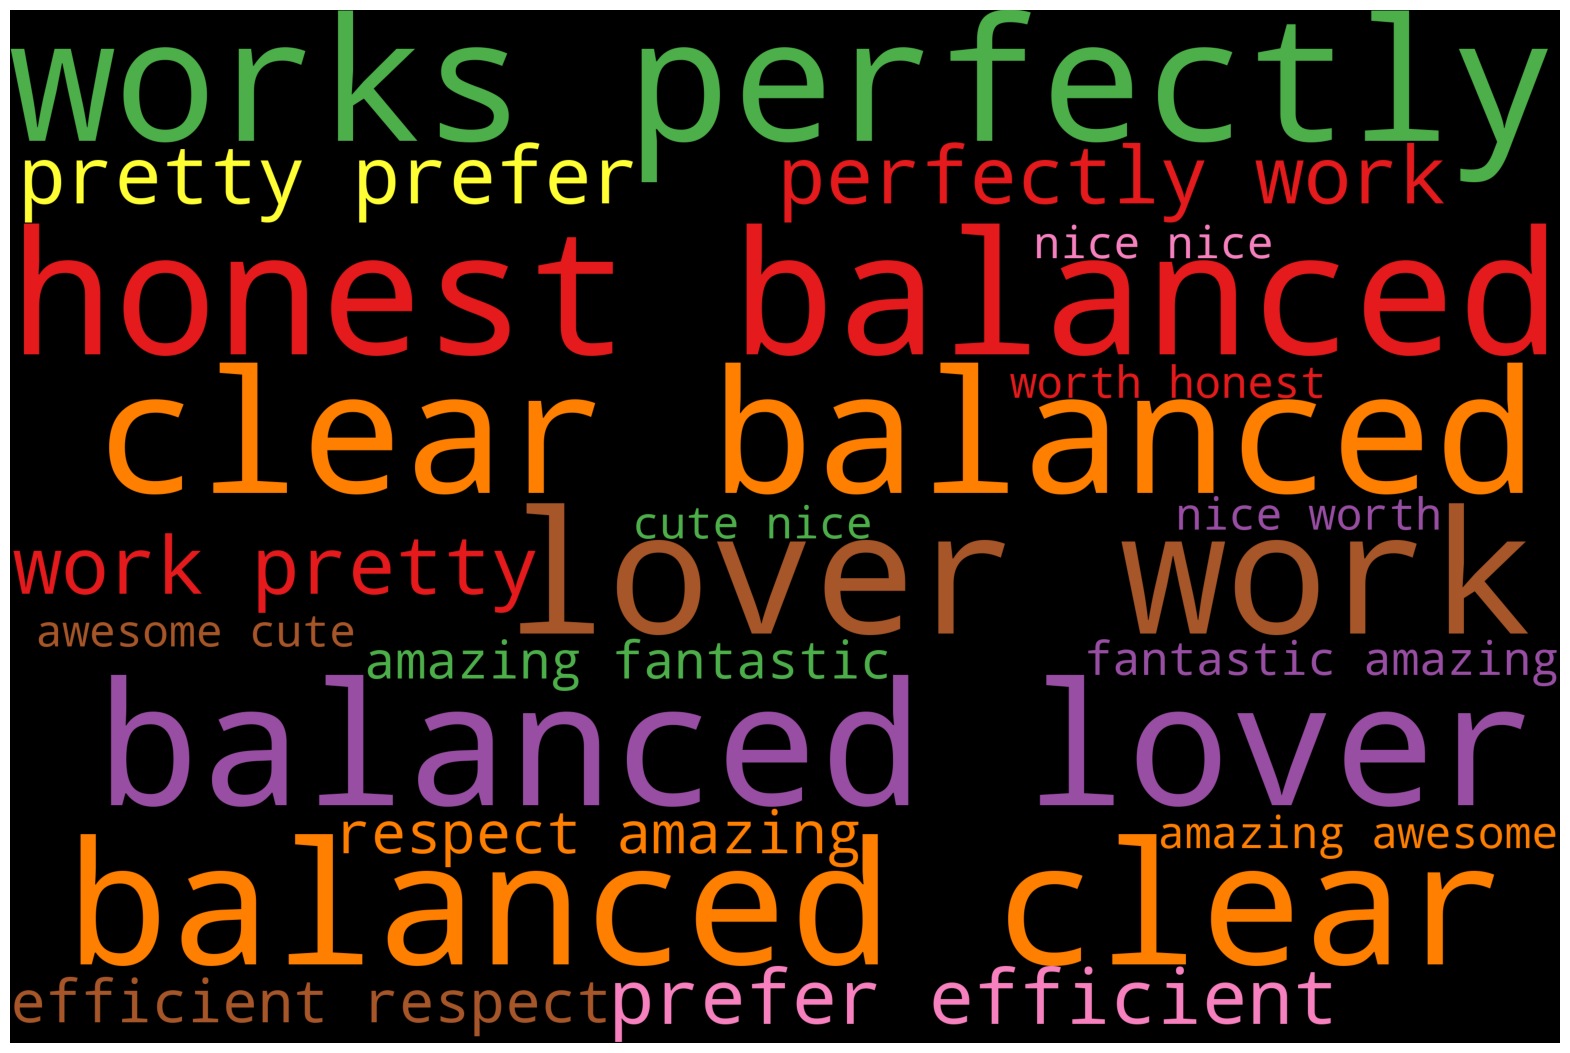

In [44]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)

negative word

In [45]:
with open("/content/negative-words.txt","r",encoding='latin-1') as f:
    negative=f.read().split("\n")

In [46]:
negative = negative[35:]

In [47]:
reviews_neg=' '.join([word
                      for word in reviews_without_sw
                      if word in negative])

In [48]:
reviews_neg

'problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud deaf problem problem noise problem expensive failed ignore issue drawback loud

#Word Cloud

In [51]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')#Word Cloud for n

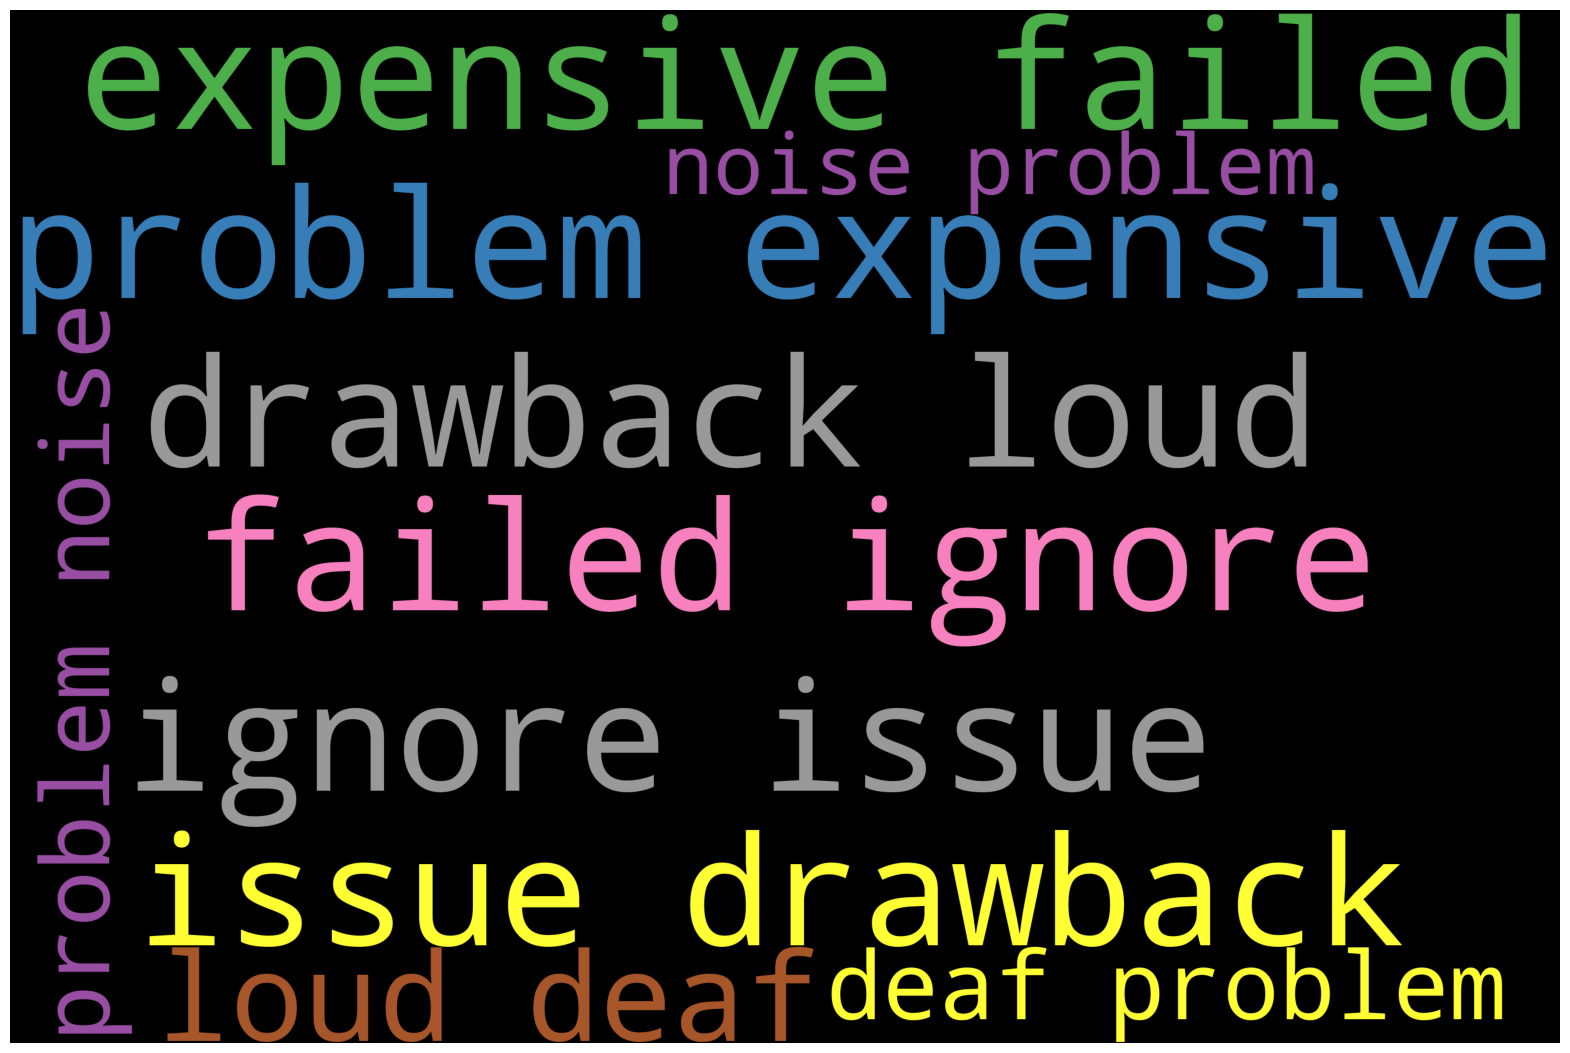

In [52]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

lenghts

In [53]:
len(reviews)

45509

In [54]:
len(reviews_neg)

2369

In [55]:
len(reviews_pos)

4499

In [99]:
maskArray = np.array(Image.open("/content/fav1.png"))
cloud = WordCloud(background_color = "white", max_words = 800, mask = maskArray, stopwords = set(STOPWORDS))

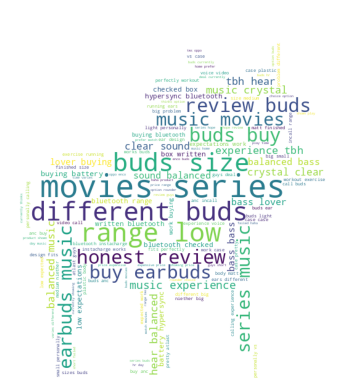

In [100]:
cloud.generate(reviews)
plt.axis("off")
plt.imshow(cloud)

#Vader Lexicon

In [79]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [81]:
sia = SentimentIntensityAnalyzer()

In [86]:
reviews

'honest review buds buy earbuds music movies series music experience tbh hear balanced music crystal clear sound balanced bass bass lover buying battery hypersync bluetooth checked box written bluetooth range low expectations work buying bluetooth instacharge works buds ear design fits perfectly workout exercise running ears different big problem different buds sizes buds light personally calling experience voice video call buds anc buy anc incall range low expected work case plastic body matt finished size medium niether big small personally vs case case pretty atlast guys deal currently showing price expensive price range tws oppo enco buds currently thinks option rounder choice option buds hr day music home prefer watch movies series buds movies series hope review guys short failed haha product shown play time varies different currently working hrs modrate pair different buds efficient respect ignore battery issue buds amazing sound bass extra boosted touch fantastic major drawback 

In [88]:
sia.polarity_scores('reviews')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [95]:
analysis = sia.polarity_scores(reviews)
analysis

{'neg': 0.066, 'neu': 0.717, 'pos': 0.217, 'compound': 1.0}

In [96]:
def get_vader_sentiment(review):

    if analysis["compound"] > 0:
        return 'positive sentiment'
    elif analysis["compound"] < 0:
        return 'negative sentiment'
    else:
        return 'neutral'

In [97]:
get_vader_sentiment(reviews)

'positive sentiment'